In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None

hr= pd.read_csv("Clustered HR Data/Modified_HR_Data_with_Nulls.csv")
hr.head()

,EmployeeNumber,Emplyee name,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,Barak Sali,41.0,Yes,Travel_Rarely,NaN,Sales,1,2,Life Sciences,...,1,80,0,8,0,1,6.0,4,0,5
1,2,Mumin Yusha,49.0,No,Travel_Frequently,279.0,Research & Development,8,1,Life Sciences,...,4,80,1,10,3,3,10.0,7,1,7
2,4,Cordia M Knopp,37.0,Yes,Travel_Rarely,1373.0,Research & Development,2,2,Other,...,2,80,0,7,3,3,0.0,0,0,0
3,5,Burton C Jin,33.0,No,Travel_Frequently,1392.0,Research & Development,3,4,Life Sciences,...,3,80,0,8,3,3,8.0,7,3,0
4,7,Femi Grek,27.0,No,Travel_Rarely,591.0,Research & Development,2,1,Medical,...,4,80,1,6,3,3,2.0,2,2,2


In [5]:
hr.Over18.nunique()

1

In [6]:
hr.StandardHours.nunique()

1

In [7]:
hr.EmployeeCount.nunique()

1

In [8]:
#Columns that have only 1 value or irrelevalnt for the analysis
hr.drop(columns=['Over18','EmployeeCount', 'StandardHours','Emplyee name', 'EmployeeNumber.1'], inplace=True)

In [9]:
hr.describe().T

,count,mean,std,min,25%,50%,75%,max
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
Age,1397.0,36.948461,9.210772,18.0,30.00,36.0,43.00,60.0
DailyRate,1397.0,803.281317,403.672451,102.0,465.00,802.0,1162.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0
JobSatisfaction,1397.0,2.731568,1.103634,1.0,2.00,3.0,4.00,4.0


In [10]:
#making sure all remaining numeric columns have different data 
# if standard diveation = 0 then all data in the column have same values
hr.std(numeric_only=True)

EmployeeNumber               602.024335
Age                            9.210772
DailyRate                    403.672451
DistanceFromHome               8.106864
Education                      1.024165
EnvironmentSatisfaction        1.093082
HourlyRate                    20.329428
JobInvolvement                 0.711561
JobLevel                       1.106940
JobSatisfaction                1.103634
MonthlyIncome               4707.956783
MonthlyRate                 7117.786044
NumCompaniesWorked             2.498009
PercentSalaryHike              3.659938
PerformanceRating              0.360824
RelationshipSatisfaction       1.081209
StockOptionLevel               0.852077
TotalWorkingYears              7.780782
TrainingTimesLastYear          1.289271
WorkLifeBalance                0.706476
YearsAtCompany                 6.153534
YearsInCurrentRole             3.623137
YearsSinceLastPromotion        3.222430
YearsWithCurrManager           3.568136
dtype: float64

In [11]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeNumber            1470 non-null   int64  
 1   Age                       1397 non-null   float64
 2   Attrition                 1470 non-null   object 
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1397 non-null   float64
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EnvironmentSatisfaction   1470 non-null   int64  
 10  Gender                    1470 non-null   object 
 11  HourlyRate                1470 non-null   int64  
 12  JobInvolvement            1470 non-null   int64  
 13  JobLevel                  1470 non-null   int64  
 14  JobRole 

In [12]:
hr.isna().sum()

EmployeeNumber               0
Age                         73
Attrition                    0
BusinessTravel               0
DailyRate                   73
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction             73
MaritalStatus                0
MonthlyIncome                0
MonthlyRate                  0
NumCompaniesWorked           0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StockOptionLevel             0
TotalWorkingYears            0
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany              73
YearsInCurrentRole           0
YearsSinceLastPromotion      0
YearsWithCurrManager         0
dtype: i

In [13]:
#handling missing values for numerical columns

hr['Age'] = hr['Age'].fillna(hr['Age'].median())
hr['DailyRate'] = hr['DailyRate'].fillna(hr['DailyRate'].median())
hr['YearsAtCompany'] = hr['YearsAtCompany'].fillna(hr['YearsAtCompany'].median())


In [14]:
#handling missing values for categorical columns
hr['JobSatisfaction'] = hr['JobSatisfaction'].fillna(hr['JobSatisfaction'].mode()[0])


In [15]:
hr.isna().sum()

EmployeeNumber              0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [28]:
hr.to_csv("Clean_data.csv", index = False)

Text(0.5, 1.0, 'Attrition By Age')

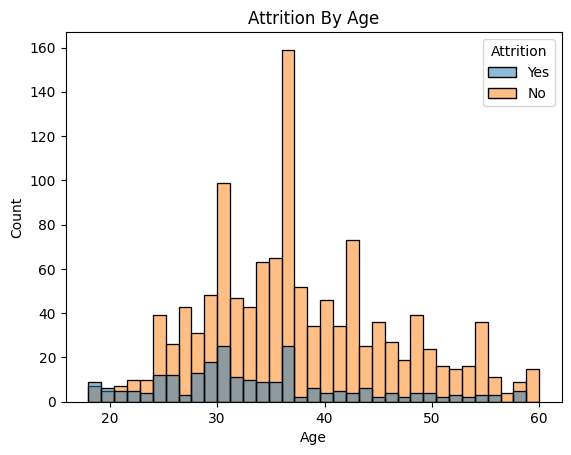

In [17]:
sns.histplot(data=hr, x="Age", hue="Attrition", bins= 35)
plt.title("Attrition By Age")

Text(0.5, 1.0, 'Attrition By Distance From Home')

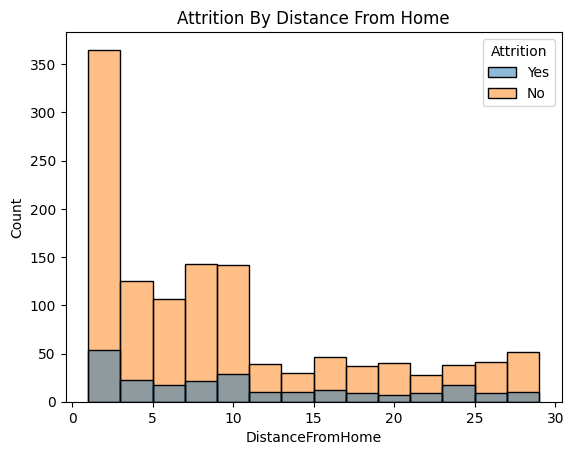

In [18]:
sns.histplot(data=hr, x="DistanceFromHome", hue="Attrition")
plt.title("Attrition By Distance From Home")

Text(0.5, 1.0, 'Attrition By Job Satisfaction')

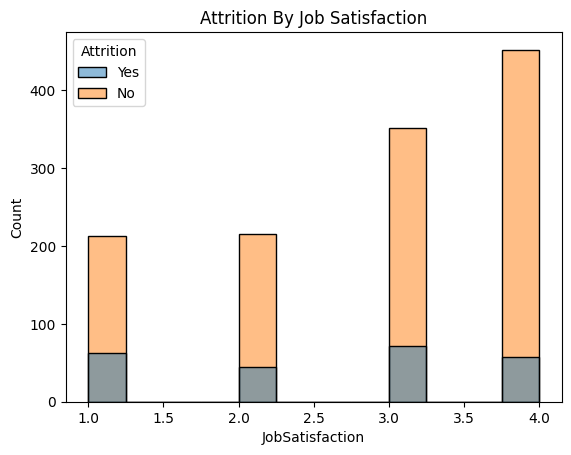

In [19]:
sns.histplot(data=hr, x="JobSatisfaction", hue="Attrition")
plt.title("Attrition By Job Satisfaction")

Text(0.5, 1.0, 'Attrition by Work Life Balance')

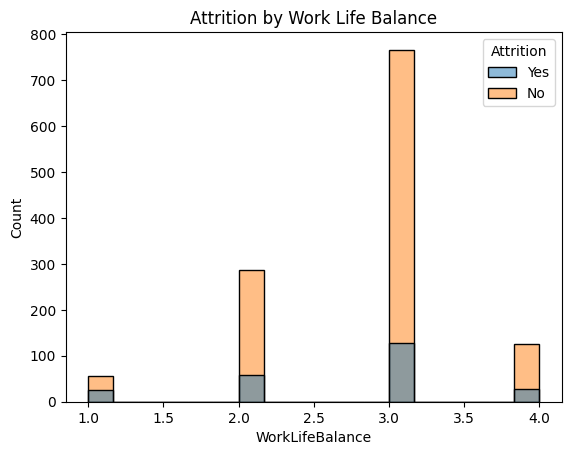

In [20]:
sns.histplot(data=hr, x="WorkLifeBalance", hue="Attrition")
plt.title("Attrition by Work Life Balance")

Text(0.5, 1.0, 'Attition by Years At Company')

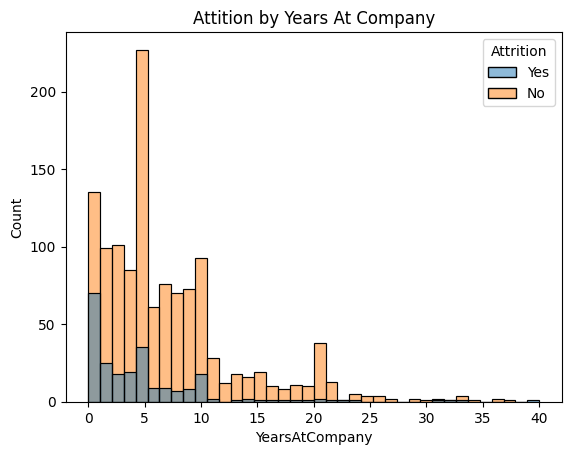

In [21]:
sns.histplot(data=hr, x="YearsAtCompany", hue="Attrition")
plt.title("Attition by Years At Company")

Text(0.5, 1.0, 'Attition by Total Working Years')

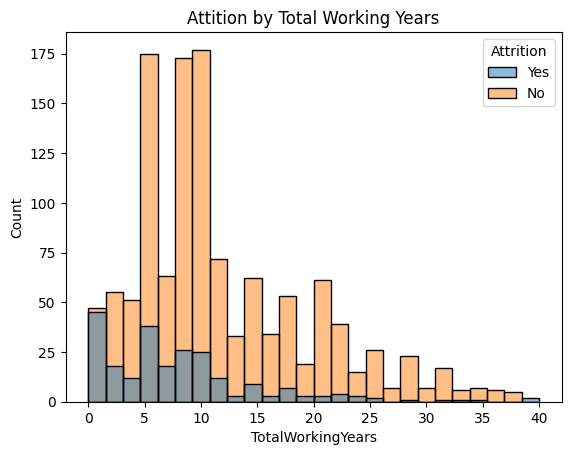

In [22]:
sns.histplot(data=hr, x="TotalWorkingYears", hue="Attrition")
plt.title("Attition by Total Working Years")

Text(0.5, 1.0, 'Attrition By Monthly Income')

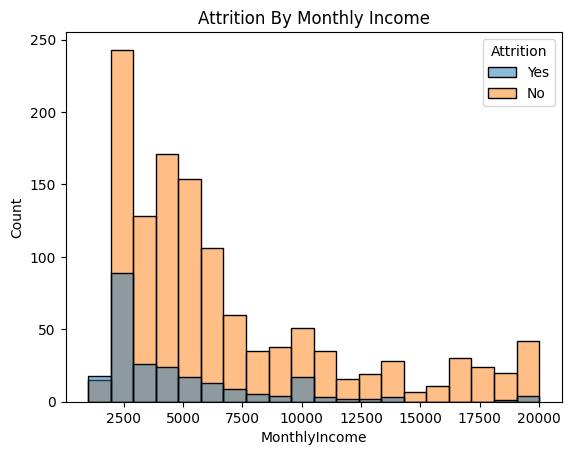

In [23]:
sns.histplot(data=hr, x= hr.MonthlyIncome, hue='Attrition')
plt.title('Attrition By Monthly Income')

In [24]:
hr[hr.OverTime=="Yes"].Attrition.value_counts()

Attrition
No     289
Yes    127
Name: count, dtype: int64

Text(0.5, 1.0, 'No OverTime')

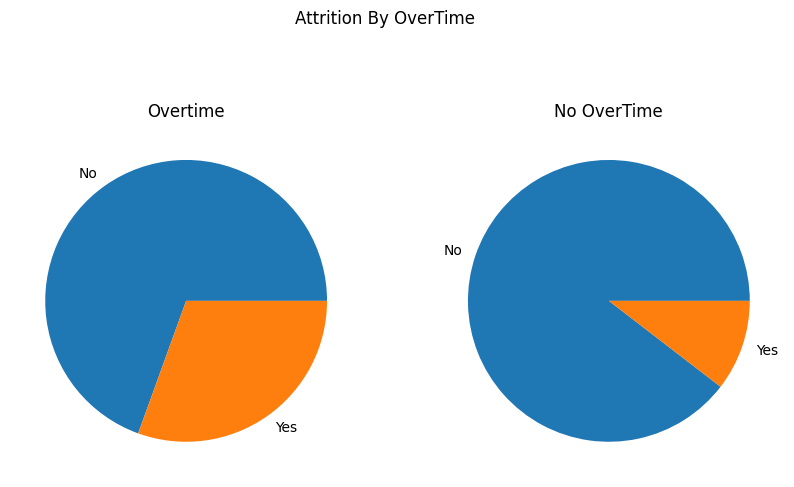

In [25]:
plt.figure(figsize=(10,6))
plt.suptitle("Attrition By OverTime")


plt.subplot(1,2,1)
plt.pie(x=hr[hr.OverTime=="Yes"].Attrition.value_counts(), labels=['No','Yes'])
plt.title("Overtime")

plt.subplot(1,2,2)
plt.pie(x=hr[hr.OverTime=="No"].Attrition.value_counts(), labels=['No','Yes'])
plt.title("No OverTime")

In [26]:
#Employee Attrition Prediction

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Select relevant columns and clean data (drop missing values, encode categorical variables)
columns = ['Age', 'MonthlyIncome', 'JobSatisfaction', 'YearsAtCompany', 'OverTime', 'WorkLifeBalance', 'DistanceFromHome', 'Attrition']
hr_test = hr[columns]

# Encode categorical variables
hr_test['Attrition'] = hr_test['Attrition'].map({'Yes': 1, 'No': 0})
hr_test['OverTime'] = hr_test['OverTime'].map({'Yes': 1, 'No': 0})

# Split data into features (X) and target (y)
X = hr_test.drop(columns='Attrition')
y = hr_test['Attrition']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print evaluation metrics
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Attrition Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

ModuleNotFoundError: No module named 'sklearn'

Mean Squared Error: 13659884.21
R^2 Score: 0.32


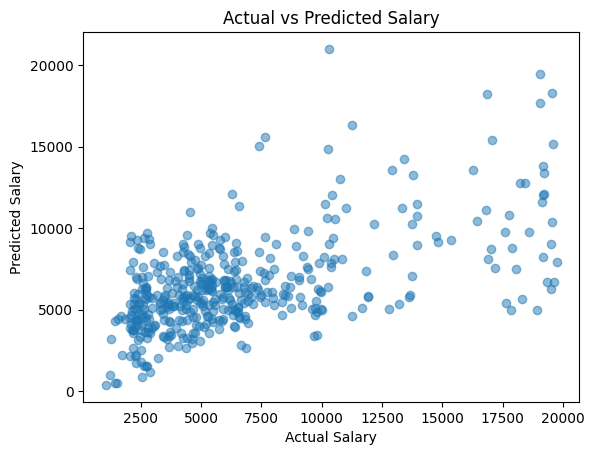

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# تحميل وتنظيف البيانات
columns = ['Age', 'MonthlyIncome', 'YearsAtCompany', 'PerformanceRating', 'JobSatisfaction']
hr_test = hr[columns]

# تقسيم الميزات (X) والهدف (y)
X = hr_test.drop('MonthlyIncome', axis=1)
y = hr_test['MonthlyIncome']

# تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# بناء نموذج الانحدار الخطي
model = LinearRegression()
model.fit(X_train, y_train)

# التنبؤ بالقيم
y_pred = model.predict(X_test)

# تقييم النموذج
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

# رسم العلاقة بين القيم الفعلية والقيم المتنبأ بها
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted Salary')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.show()

In [54]:
from sklearn.ensemble import RandomForestRegressor

#performance Rating Prediction
# Select relevant columns
columns = ['PerformanceRating', 'JobInvolvement', 'JobSatisfaction', 'YearsAtCompany']
hr_test = hr[columns]

# Features (X) and target (y)
X = hr_test.drop('PerformanceRating', axis=1)
y = hr_test['PerformanceRating']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Use Random Forest Regressor for prediction
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')


Mean Squared Error: 0.14
R^2 Score: -0.16


Mean Squared Error: 1.53
R^2 Score: -0.23


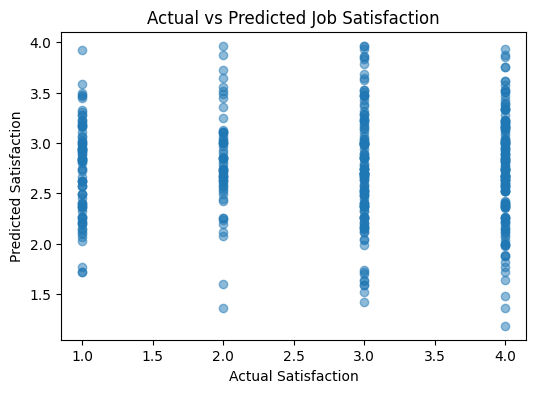

In [55]:
#Employee Satisfaction Forecasting

# Assuming 'data' is your DataFrame
# Select relevant columns
columns = ['JobSatisfaction', 'TrainingTimesLastYear', 'OverTime', 'YearsAtCompany', 'WorkLifeBalance']
hr_test = hr[columns]

# Convert categorical variables to numerical
hr_test['OverTime'] = hr_test['OverTime'].map({'Yes': 1, 'No': 0})  # Convert Yes/No to 1/0

# Features (X) and target (y)
X = hr_test.drop('JobSatisfaction', axis=1)
y = hr_test['JobSatisfaction']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

# Plotting actual vs predicted values
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted Job Satisfaction')
plt.xlabel('Actual Satisfaction')
plt.ylabel('Predicted Satisfaction')
plt.show()

Mean Squared Error: 0.1397580117716553


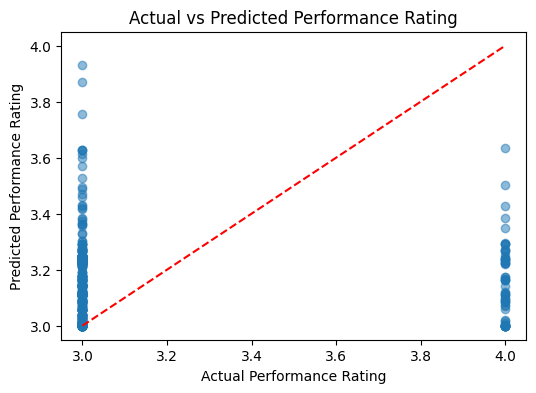

In [56]:
#Performance Rating Prediction
# Select relevant columns
columns = ['PerformanceRating', 'JobInvolvement', 'JobSatisfaction', 'YearsAtCompany']
hr_test = hr[columns]

# Features (X) and target (y)
X = hr_test.drop('PerformanceRating', axis=1)
y = hr_test['PerformanceRating']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model and make predictions
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate and print Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Plot actual vs predicted performance rating
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Reference line for perfect prediction
plt.title('Actual vs Predicted Performance Rating')
plt.xlabel('Actual Performance Rating')
plt.ylabel('Predicted Performance Rating')
plt.show()

Mean Squared Error: 0.5842916911391908


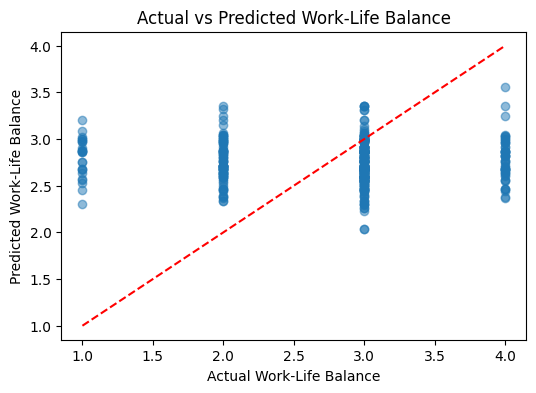

In [57]:
#Work-Life Balance Trends

# Load your data (assumed as 'data' DataFrame)
# data = pd.read_csv('your_data.csv')  # Uncomment this line to load your data

# Select relevant columns and clean data
hr_test = hr[['WorkLifeBalance', 'OverTime', 'JobSatisfaction', 'YearsAtCompany']]

# Ensure that categorical variables are converted to numeric
hr_test['OverTime'] = hr_test['OverTime'].map({'Yes': 1, 'No': 0})

# Convert other columns to numeric, if necessary
hr_test['JobSatisfaction'] = pd.to_numeric(hr_test['JobSatisfaction'], errors='coerce')
hr_test['YearsAtCompany'] = pd.to_numeric(hr_test['YearsAtCompany'], errors='coerce')


# Split data into features and target
X = hr_test.drop('WorkLifeBalance', axis=1)
y = hr_test['WorkLifeBalance']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Plot actual vs predicted Work-Life Balance
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Reference line for perfect prediction
plt.title('Actual vs Predicted Work-Life Balance')
plt.xlabel('Actual Work-Life Balance')
plt.ylabel('Predicted Work-Life Balance')
plt.show()

Accuracy: 0.854875283446712
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       380
           1       0.20      0.02      0.03        61

    accuracy                           0.85       441
   macro avg       0.53      0.50      0.48       441
weighted avg       0.77      0.85      0.80       441

Accuracy: 0.29705215419501135
              precision    recall  f1-score   support

         1.0       0.25      0.15      0.19        86
         2.0       0.10      0.08      0.09        62
         3.0       0.28      0.24      0.26       136
         4.0       0.36      0.51      0.42       157

    accuracy                           0.30       441
   macro avg       0.25      0.25      0.24       441
weighted avg       0.28      0.30      0.28       441



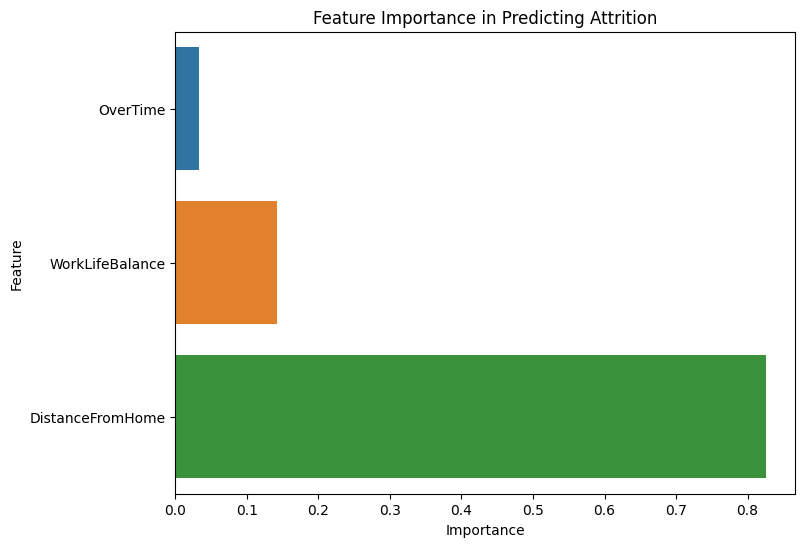

<Figure size 1000x600 with 0 Axes>

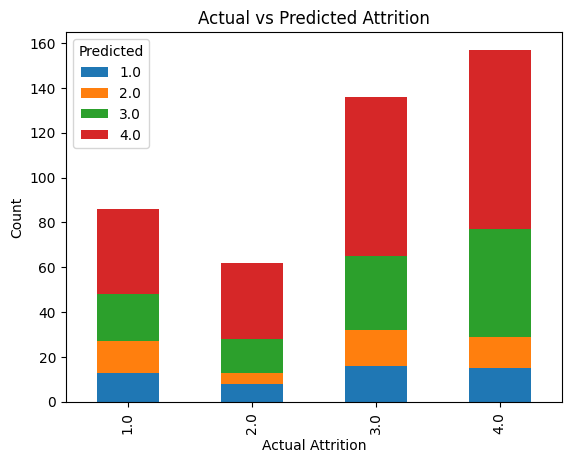

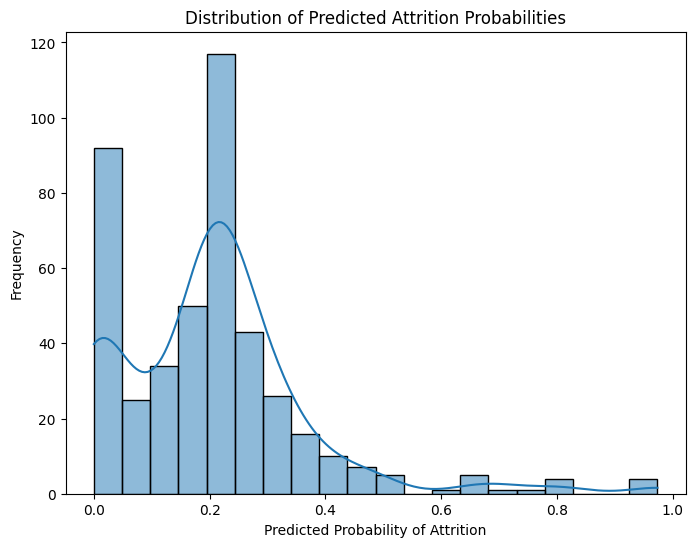

In [58]:
# Impact of Work-Life Balance on Attrition
from sklearn.ensemble import RandomForestClassifier

# Define features and target variable
columns = ['JobSatisfaction',  'OverTime', 'WorkLifeBalance', 'Attrition', 'DistanceFromHome']
hr_test = hr[columns]
hr_test['Attrition'] = hr_test['Attrition'].map({'Yes': 1, 'No': 0})
hr_test['OverTime'] = hr_test['OverTime'].map({'Yes': 1, 'No': 0})
X = hr_test.drop(["Attrition","DistanceFromHome"], axis=1)  # Features related to work-life balance
y = hr_test['Attrition']

# Split the dataset into training and test sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the RandomForestClassifier
classifier = RandomForestClassifier(random_state=42)

# Train the classifier
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


# Impact of Work-Life Balance on Job Satisfaction

X = hr_test.drop(["Attrition","JobSatisfaction"], axis=1)
y = hr_test['JobSatisfaction']

# Split the dataset into training and test sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the RandomForestClassifier
classifier = RandomForestClassifier(random_state=42)

# Train the classifier
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



# Get feature importances from the RandomForest model
importances = classifier.feature_importances_
features = X.columns

# Plot feature importances
plt.figure(figsize=(8, 6))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance in Predicting Attrition')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()






from sklearn.metrics import roc_curve, auc

# Get predicted probabilities
y_prob = classifier.predict_proba(X_test)[:, 1]



# Create a DataFrame for comparison
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Plot actual vs predicted attrition
plt.figure(figsize=(10, 6))
comparison_df.groupby(['Actual', 'Predicted']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Actual vs Predicted Attrition')
plt.xlabel('Actual Attrition')
plt.ylabel('Count')
plt.show()








# Plot distribution of predicted probabilities
plt.figure(figsize=(8, 6))
sns.histplot(y_prob, bins=20, kde=True)
plt.title('Distribution of Predicted Attrition Probabilities')
plt.xlabel('Predicted Probability of Attrition')
plt.ylabel('Frequency')
plt.show()




Accuracy: 0.29705215419501135
              precision    recall  f1-score   support

         1.0       0.25      0.15      0.19        86
         2.0       0.10      0.08      0.09        62
         3.0       0.28      0.24      0.26       136
         4.0       0.36      0.51      0.42       157

    accuracy                           0.30       441
   macro avg       0.25      0.25      0.24       441
weighted avg       0.28      0.30      0.28       441



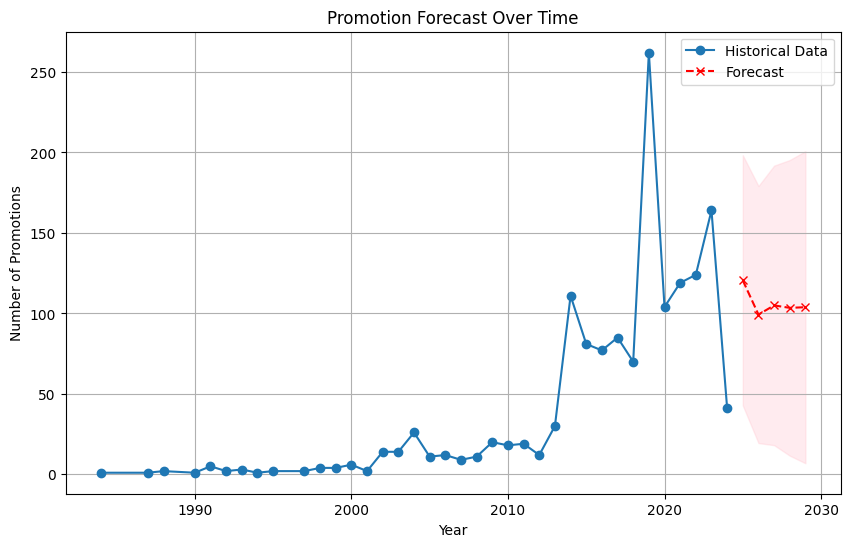

In [59]:
# Create a target variable 'Promoted' based on some criteria
# Assuming 'YearsSinceLastPromotion' == 0 indicates a promotion in the last cycle
hr_test = hr[['YearsAtCompany', 'PerformanceRating', 'JobSatisfaction', 'YearsSinceLastPromotion']]

hr_test['Promoted'] = hr_test['YearsSinceLastPromotion'].apply(lambda x: 1 if x == 0 else 0)

# Define features and target
X = hr_test[['YearsAtCompany', 'PerformanceRating', 'JobSatisfaction']]  # Features that might influence promotion
y = hr_test['Promoted']  # Target is whether the employee was promoted

# Train a classification model
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Predict promotions and evaluate
y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# The model can then be used to forecast which employees are likely to be promoted in the future.

# Let's group by HireYear and plot the number of promotions over time

current_year = 2024

# Create the 'HireYear' column by subtracting 'YearsAtCompany' from the current year
hr['HireYear'] = current_year - hr['YearsAtCompany']
promotion_trend = hr.groupby('HireYear')['YearsSinceLastPromotion'].count()

# Import the updated ARIMA from statsmodels
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Fit ARIMA model to forecast promotions
model = ARIMA(promotion_trend.values, order=(1, 1, 1))  # Adjust order based on your data
model_fit = model.fit()

# Make predictions for future promotions
forecast_years = 5  # Forecast 5 years into the future
forecast = model_fit.get_forecast(steps=forecast_years)
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

# Extend index to cover forecasted years
last_year = int(promotion_trend.index[-1])
forecast_index = list(range(last_year + 1, last_year + 1 + forecast_years))

# Plot historical and forecasted promotions
plt.figure(figsize=(10, 6))
plt.plot(promotion_trend.index, promotion_trend.values, marker='o', label='Historical Data')
plt.plot(forecast_index, forecast_values, marker='x', linestyle='--', color='red', label='Forecast')

# Fill between the confidence interval boundaries (no iloc, directly using the NumPy array)
plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)

plt.title('Promotion Forecast Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Promotions')
plt.legend()
plt.grid(True)
plt.show()
